# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [35]:
import openweathermapy.core as owm
settings = {"units": "imperial", "appid": api_key}
import logging
logging.basicConfig(level=logging.INFO)

In [40]:
import logging
logFormatter = '%(asctime)s - %(levelname)s - %(message)s'
logging.basicConfig(format=logFormatter, level=logging.DEBUG)
logger = logging.getLogger(__name__)

In [41]:
lat = []
for city in cities:
    try:
        city_lat = owm.get_current(city, **settings)["coord"]["lat"]
    except:
        city_lat = "NAN"
    lat.append(city_lat)
    logger.info(f"Latitude for {city} is {city_lat}")

INFO:__main__:Latitude for yellowknife is 62.45
INFO:__main__:Latitude for nalut is 31.86
INFO:__main__:Latitude for westport is 41.14
INFO:__main__:Latitude for khatanga is 71.98
INFO:__main__:Latitude for padang is -0.92
INFO:__main__:Latitude for surt is 31.21
INFO:__main__:Latitude for hilo is 19.71
INFO:__main__:Latitude for asau is NAN
INFO:__main__:Latitude for yirol is NAN
INFO:__main__:Latitude for nikolskoye is 59.7
INFO:__main__:Latitude for kirakira is -10.46
INFO:__main__:Latitude for fasa is 28.94
INFO:__main__:Latitude for vostok is 46.45
INFO:__main__:Latitude for vestmanna is 62.16
INFO:__main__:Latitude for haibowan is NAN
INFO:__main__:Latitude for bakel is 14.9
INFO:__main__:Latitude for hermanus is -34.42
INFO:__main__:Latitude for east london is -33.02
INFO:__main__:Latitude for cape town is -33.93
INFO:__main__:Latitude for torbay is 47.66
INFO:__main__:Latitude for bambous virieux is -20.34
INFO:__main__:Latitude for jamestown is -33.21
INFO:__main__:Latitude fo

INFO:__main__:Latitude for sorland is 67.67
INFO:__main__:Latitude for ugoofaaru is 5.67
INFO:__main__:Latitude for gravelbourg is 49.88
INFO:__main__:Latitude for vardo is 39.62
INFO:__main__:Latitude for corinto is 3.17
INFO:__main__:Latitude for potchefstroom is -26.71
INFO:__main__:Latitude for okoneshnikovo is 54.84
INFO:__main__:Latitude for suntar is 62.16
INFO:__main__:Latitude for iqaluit is 63.75
INFO:__main__:Latitude for gangotri is NAN
INFO:__main__:Latitude for ramhormoz is 31.28
INFO:__main__:Latitude for east angus is 45.48
INFO:__main__:Latitude for vila velha is -3.71
INFO:__main__:Latitude for rio gallegos is -51.62
INFO:__main__:Latitude for jiayuguan is 39.77
INFO:__main__:Latitude for dongsheng is 29.72
INFO:__main__:Latitude for nouadhibou is 20.93
INFO:__main__:Latitude for necochea is -38.55
INFO:__main__:Latitude for eskisehir is 39.78
INFO:__main__:Latitude for port-gentil is -0.72
INFO:__main__:Latitude for the pas is 53.82
INFO:__main__:Latitude for hamilto

INFO:__main__:Latitude for asfi is NAN
INFO:__main__:Latitude for khuzdar is 27.8
INFO:__main__:Latitude for chhatak is 25.03
INFO:__main__:Latitude for vangaindrano is -23.35
INFO:__main__:Latitude for barbar is NAN
INFO:__main__:Latitude for vanavara is 60.35
INFO:__main__:Latitude for xudat is 41.63
INFO:__main__:Latitude for berlevag is 70.86
INFO:__main__:Latitude for virginia beach is 36.85
INFO:__main__:Latitude for acari is -6.44
INFO:__main__:Latitude for abu dhabi is 24.47
INFO:__main__:Latitude for ancud is -41.87
INFO:__main__:Latitude for kilemary is 56.78
INFO:__main__:Latitude for hit is 33.64
INFO:__main__:Latitude for mahon is 51.89
INFO:__main__:Latitude for boa vista is 2.82
INFO:__main__:Latitude for ambilobe is -13.19
INFO:__main__:Latitude for denpasar is -8.65
INFO:__main__:Latitude for eydhafushi is 5.1
INFO:__main__:Latitude for tsihombe is NAN
INFO:__main__:Latitude for puerto narino is -3.77
INFO:__main__:Latitude for swan hill is -35.34
INFO:__main__:Latitud

INFO:__main__:Latitude for kushiro is 43.11
INFO:__main__:Latitude for tobermory is 45.25
INFO:__main__:Latitude for male is 50.74
INFO:__main__:Latitude for galesong is -5.32
INFO:__main__:Latitude for maceio is -9.67
INFO:__main__:Latitude for tuggurt is NAN
INFO:__main__:Latitude for dingle is 11
INFO:__main__:Latitude for annau is 37.89
INFO:__main__:Latitude for shingu is 33.72
INFO:__main__:Latitude for kaduna is 10.52
INFO:__main__:Latitude for puntarenas is 9.98
INFO:__main__:Latitude for zhanakorgan is 43.91
INFO:__main__:Latitude for pahrump is 36.21
INFO:__main__:Latitude for port hedland is -20.31
INFO:__main__:Latitude for kota belud is 6.35
INFO:__main__:Latitude for varhaug is 58.61
INFO:__main__:Latitude for asosa is 10.07
INFO:__main__:Latitude for jalu is 29.03
INFO:__main__:Latitude for urdzhar is NAN
INFO:__main__:Latitude for abu zabad is 12.35
INFO:__main__:Latitude for bowen is -20.01
INFO:__main__:Latitude for galatina is 40.17
INFO:__main__:Latitude for sept-il

In [42]:
temperature = []
for city in cities:
    try:
        city_temperature = owm.get_current(city, **settings)["main"]["temp"]
    except:
        city_temperature = "NAN"
    temperature.append(city_temperature)
    logger.info(f"Temperature for {city} is {city_temperature}")

INFO:__main__:Temperature for yellowknife is -30.44
INFO:__main__:Temperature for nalut is 54.39
INFO:__main__:Temperature for westport is 25
INFO:__main__:Temperature for khatanga is -7.8
INFO:__main__:Temperature for padang is 78.57
INFO:__main__:Temperature for surt is 57.09
INFO:__main__:Temperature for hilo is 63.81
INFO:__main__:Temperature for asau is NAN
INFO:__main__:Temperature for yirol is NAN
INFO:__main__:Temperature for nikolskoye is 30.07
INFO:__main__:Temperature for kirakira is 78.04
INFO:__main__:Temperature for fasa is 59
INFO:__main__:Temperature for vostok is -4.83
INFO:__main__:Temperature for vestmanna is 33.8
INFO:__main__:Temperature for haibowan is NAN
INFO:__main__:Temperature for bakel is 76.6
INFO:__main__:Temperature for hermanus is 81.14
INFO:__main__:Temperature for east london is 66.2
INFO:__main__:Temperature for cape town is 78.22
INFO:__main__:Temperature for torbay is 25.41
INFO:__main__:Temperature for bambous virieux is 87.49
INFO:__main__:Tempera

INFO:__main__:Temperature for bodden town is 78.82
INFO:__main__:Temperature for napa is 55.13
INFO:__main__:Temperature for fairbanks is 10.33
INFO:__main__:Temperature for grand gaube is 87.8
INFO:__main__:Temperature for vao is 30.11
INFO:__main__:Temperature for henties bay is 66
INFO:__main__:Temperature for tuktoyaktuk is -9.71
INFO:__main__:Temperature for kathu is 86.23
INFO:__main__:Temperature for port elizabeth is 28.38
INFO:__main__:Temperature for rawson is 54.88
INFO:__main__:Temperature for sorland is 41
INFO:__main__:Temperature for ugoofaaru is 82.35
INFO:__main__:Temperature for gravelbourg is -2.69
INFO:__main__:Temperature for vardo is 25.45
INFO:__main__:Temperature for corinto is 68
INFO:__main__:Temperature for potchefstroom is 76.44
INFO:__main__:Temperature for okoneshnikovo is 27
INFO:__main__:Temperature for suntar is -11.88
INFO:__main__:Temperature for iqaluit is -0.18
INFO:__main__:Temperature for gangotri is NAN
INFO:__main__:Temperature for ramhormoz is 

INFO:__main__:Temperature for ola is -5.01
INFO:__main__:Temperature for bajil is 41.45
INFO:__main__:Temperature for karabulak is 35.2
INFO:__main__:Temperature for port hardy is 42.8
INFO:__main__:Temperature for metro is 87.82
INFO:__main__:Temperature for hong gai is 71.6
INFO:__main__:Temperature for miamisburg is 21.33
INFO:__main__:Temperature for ginir is 72.37
INFO:__main__:Temperature for tumannyy is NAN
INFO:__main__:Temperature for new albany is 24.84
INFO:__main__:Temperature for guerrero negro is 60.42
INFO:__main__:Temperature for whitehorse is 20.41
INFO:__main__:Temperature for tual is 81.77
INFO:__main__:Temperature for santa cruz is 76.05
INFO:__main__:Temperature for yumen is 36.01
INFO:__main__:Temperature for malwan is NAN
INFO:__main__:Temperature for sangar is -28.68
INFO:__main__:Temperature for cockburn town is 79.27
INFO:__main__:Temperature for suruc is 42.8
INFO:__main__:Temperature for narsaq is 35.6
INFO:__main__:Temperature for asfi is NAN
INFO:__main__:

INFO:__main__:Temperature for umm lajj is 80.78
INFO:__main__:Temperature for soyo is 82.4
INFO:__main__:Temperature for gorontalo is 76.12
INFO:__main__:Temperature for farafangana is 81.07
INFO:__main__:Temperature for la rioja is 68.11
INFO:__main__:Temperature for lasa is 56.66
INFO:__main__:Temperature for kazalinsk is NAN
INFO:__main__:Temperature for aberdeen is 48.09
INFO:__main__:Temperature for bokspits is NAN
INFO:__main__:Temperature for shu is 42.58
INFO:__main__:Temperature for diffa is 77.09
INFO:__main__:Temperature for saleaula is NAN
INFO:__main__:Temperature for killybegs is 40.62
INFO:__main__:Temperature for sao filipe is 73.13
INFO:__main__:Temperature for mattawa is 6.12
INFO:__main__:Temperature for mao is 71.08
INFO:__main__:Temperature for along is 64.96
INFO:__main__:Temperature for los palacios is 73.33
INFO:__main__:Temperature for odesskoye is 30.36
INFO:__main__:Temperature for payson is 33.37
INFO:__main__:Temperature for diamantina is 65.98
INFO:__main_

In [6]:
cloudiness = []
for city in cities:
    try:
        city_cloudiness = owm.get_current(city, **settings)["clouds"]["all"]
    except:
        city_cloudiness = "NAN"
    cloudiness.append(city_cloudiness)
    logger.info(f"Cloudiness for {city} is {city_cloudiness}")

In [7]:
humidity = []
for city in cities:
    try:
        city_humidity = owm.get_current(city, **settings)["main"]["humidity"]
    except:
        city_temperature = "NAN"
    humidity.append(city_humidity)
    logger.info(f"Humidity for {city} is {city_humidity}")

In [8]:
wind_speed = []
for city in cities:
    try:
        city_wind = owm.get_current(city, **settings)["wind"]["speed"]
    except:
        city_wind = "NAN"
    wind_speed.append(city_wind)
    logger.info(f"Wind Speed for {city} is {city_wind}")

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
city_weather = pd.DataFrame({"City": cities, 
                             "Latitude": lat, 
                             "Temperature": temperature, 
                             "Humidity": humidity, 
                             "Cloudiness": cloudiness, 
                             "Wind Speed": wind_speed})

city_weather.to_csv("weather.csv")
city_weather

,City,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,yellowknife,62.45,-29.74,66,20,2.1
1,nalut,31.86,54.39,30,0,5.69
2,westport,41.14,25.95,50,1,3.1
3,khatanga,71.98,-7.8,88,100,3.55
4,padang,-0.92,78.57,70,100,0.57
...,...,...,...,...,...,...
613,la seyne-sur-mer,43.1,44.1,42,12,8.7
614,rawah,NAN,NAN,42,NAN,NAN
615,eureka,40.8,55.15,87,90,1.79
616,alpena,45.06,11.55,78,20,3.1


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

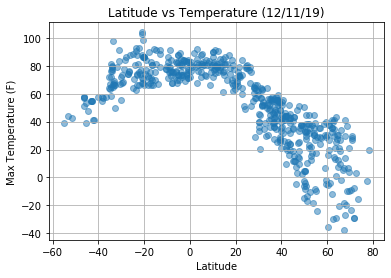

In [31]:
plt.scatter(city_weather["Latitude"], city_weather["Temperature"], alpha=0.5)
plt.title('Latitude vs Temperature (12/11/19)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig('Temperature.png')
plt.show()

#### Latitude vs. Humidity Plot

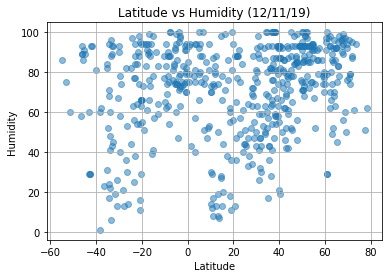

In [32]:
plt.scatter(city_weather["Latitude"], city_weather["Humidity"], alpha=0.5)
plt.title('Latitude vs Humidity (12/11/19)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.savefig('Humidity.png')
plt.show()


#### Latitude vs. Cloudiness Plot

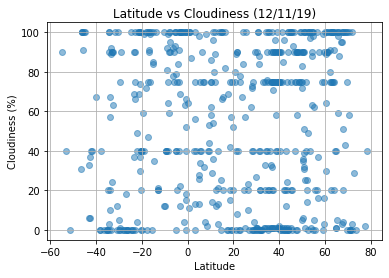

In [33]:
plt.scatter(city_weather["Latitude"], city_weather["Cloudiness"], alpha=0.5)
plt.title('Latitude vs Cloudiness (12/11/19)')
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig('Cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

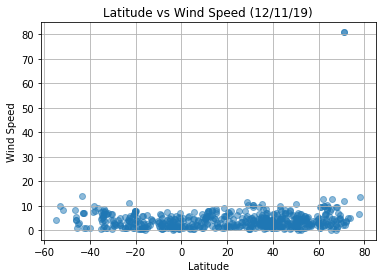

In [34]:
plt.scatter(city_weather["Latitude"], city_weather["Wind Speed"], alpha=0.5)
plt.title('Latitude vs Wind Speed (12/11/19)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.savefig('wind_speed.png')
plt.show()

# Observations

In [ ]:
## 1. Temperatures are higher for cities closer to the equator. The cities closer to 0 degrees latitude has the highest temperatures

In [ ]:
## 2. There was no observable correlation between Humidity and Latitude. The humidity for each city showed no pattern when compared to the latitude for each city

In [ ]:
## 3. Wind Speed and Cloudiness were constant accross laitudes as well.
## There was no observable pattern for wind speed or cloudiness when compared to the latitude for each city.